In [2]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json

In [11]:
g = nx.Graph()
g.add_node(2)
g.add_nodes_from([1, 2, 3, 4])
g.add_edges_from([(1, 7), (1, 3), (2, 4), (3, 4), (3, 2)])
g.add_nodes_from([
    (4, {'color': 'blue'}), (7, {'color': 'red'})
])

# g.nodes[4]['color'] = 'blue'
nx.adjacency_matrix(g).todense()

array([[0, 0, 1, 1, 0],
       [0, 0, 1, 0, 1],
       [1, 1, 0, 1, 0],
       [1, 0, 1, 0, 0],
       [0, 1, 0, 0, 0]])

In [3]:
print(g.nodes[7])

{'color': 'red'}


In [5]:
# g.adj[1]
g[7], g.nodes[7]

(AtlasView({1: {}}), {'color': 'red'})

In [144]:
# we can extract the edges of the graph and use it to create a new graph
edges = list(g.edges())
# g2.add_edges_from(edges)

# or
g2 = nx.DiGraph(g)

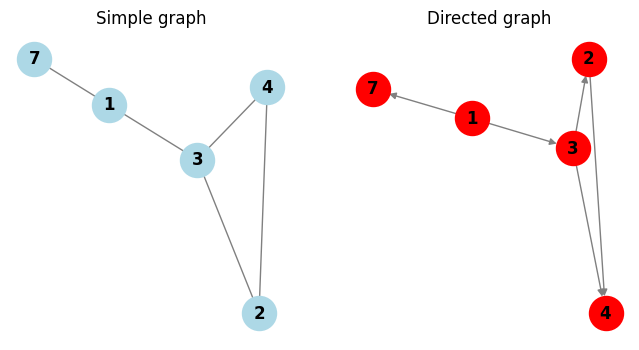

In [15]:
g2 = nx.DiGraph()
g2.add_nodes_from([1, 2, 3, 4])
g2.add_edges_from([(1, 7), (1, 3), (2, 4), (3, 4), (3, 2)])

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
nx.draw(g, with_labels=True, font_weight='bold', node_color='lightblue', node_size=600, edge_color='gray', ax = plt.gca())
plt.title('Simple graph')

plt.subplot(1, 2, 2)
nx.draw(g2, with_labels=True, font_weight='bold', node_color='red', node_size=600, edge_color='gray', ax = plt.gca())
plt.title('Directed graph')
plt.show()

In [97]:
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)
list(H.edges())

[(0, 1), (0, 2), (1, 2)]

In [17]:
# Create a graph using an adjacency matrix
adj_matrix = np.array([[0, 1, 1],
                       [1, 0, 1],
                       [1, 1, 0]])

G = nx.from_numpy_array(adj_matrix)
print(list(g.edges()))

[(2, 4), (2, 3), (1, 7), (1, 3), (3, 4)]


In [21]:
sp = nx.shortest_path(G, source=1, target=2)
avg_path = nx.average_shortest_path_length(G)
diameter = nx.diameter(G)

## Save and load graph

1. Edge List Format (.edgelist)
    - Best for: Simple graphs without complex attributes
    - Use cases: Social networks, collaboration networks, basic connectivity data
    - Pros: Human-readable, space-efficient, widely supported
    - Cons: Limited metadata support

```py
nx.write_edgelist(G, "graph.edgelist")
G_loaded = nx.read_edgelist("graph.edgelist")
```

2. GML Format (.gml)
    - Best for: Graphs with rich node/edge attributes
    - Use cases: Biological networks, semantic networks, annotated graphs
    - Pros: Supports complex attributes, human-readable
    - Cons: Can be verbose for large graphs

```py
nx.write_gml(G, "graph.gml")
G_loaded = nx.read_gml("graph.gml")
```

3. GraphML Format (.graphml)
    - Best for: Complex graphs with extensive metadata
    - Use cases: Geographic networks, software dependencies, multi-layer networks
    - Pros: XML-based, excellent attribute support, widely supported
    - Cons: Larger file size, more complex structure

```py
nx.write_graphml(G, "graph.graphml")
G_loaded = nx.read_graphml("graph.graphml")
```

4. JSON Format (.json)
    - Best for: Web applications, APIs, data interchange
    - Use cases: Web visualizations, REST APIs, JavaScript applications
    - Pros: Universal format, easy to parse, good for web integration
    - Cons: Can be memory-intensive for large graphs

In [25]:
g = nx.Graph()
g.add_node(2)
g.add_nodes_from([1, 2, 3, 4])
g.add_edges_from([(1, 7), (1, 3), (2, 4), (3, 4), (3, 2)])
g.add_nodes_from([
    (4, {'color': 'blue'}), (7, {'color': 'red'})
])

In [104]:
data = nx.node_link_data(g)
data

{'directed': False,
 'multigraph': False,
 'graph': {},
 'nodes': [{'id': 2},
  {'id': 1},
  {'id': 3},
  {'color': 'blue', 'id': 4},
  {'color': 'red', 'id': 7}],
 'links': [{'source': 2, 'target': 4},
  {'source': 2, 'target': 3},
  {'source': 1, 'target': 7},
  {'source': 1, 'target': 3},
  {'source': 3, 'target': 4}]}

In [105]:
with open('graph.json', 'w') as f:
    json.dump(data, f)

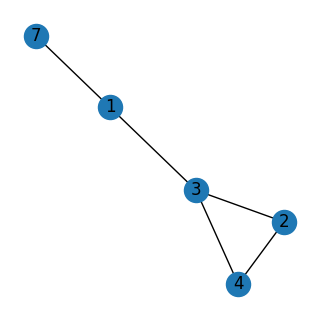

In [109]:
with open('./graph.json', 'r') as f:
    data = json.load(f)

h = nx.node_link_graph(data, edges="links")

plt.figure(figsize=(3, 3))
nx.draw(h, with_labels=True)
plt.show()

In [32]:
edge_dict = {
    'source': ['A', 'A', 'B', 'C', 'D'],
    'target': ['B', 'C', 'D', 'D', 'E'],
    'weight': [1.0, 2.0, 1.5, 0.5, 3.0],
    'type': ['friends', 'colleague', 'family', 'friends', 'colleague']
}

edge_data = pd.DataFrame(edge_dict)
edge_data.head()

,source,target,weight,type
0,A,B,1.0,friends
1,A,C,2.0,colleague
2,B,D,1.5,family
3,C,D,0.5,friends
4,D,E,3.0,colleague


## Read from pandas dataframe

### 1. Basic Edge List from DataFrame

In [39]:
g = nx.from_pandas_edgelist(
    edge_data,
    source='source',
    target='target',
    edge_attr=True,
    # edge_attr=['weight', 'type'].
    create_using=nx.Graph()
)

for node, neig in g.adj.items():
    print(node, neig)

A {'B': {'weight': 1.0, 'type': 'friends'}, 'C': {'weight': 2.0, 'type': 'colleague'}}
B {'A': {'weight': 1.0, 'type': 'friends'}, 'D': {'weight': 1.5, 'type': 'family'}}
C {'A': {'weight': 2.0, 'type': 'colleague'}, 'D': {'weight': 0.5, 'type': 'friends'}}
D {'B': {'weight': 1.5, 'type': 'family'}, 'C': {'weight': 0.5, 'type': 'friends'}, 'E': {'weight': 3.0, 'type': 'colleague'}}
E {'D': {'weight': 3.0, 'type': 'colleague'}}


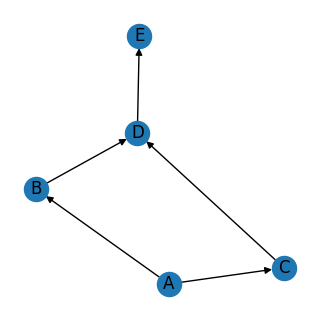

In [118]:
# Create directed graph
g = nx.from_pandas_edgelist(
    edge_data,
    source='source',
    target='target',
    edge_attr=True,
    # edge_attr=['weight', 'type'].
    create_using=nx.DiGraph()
)

plt.figure(figsize=(3, 3))
nx.draw(g, with_labels=True)
plt.show()

### 2. Loading Node Data from DataFrame

In [43]:
node_data = pd.DataFrame({
    'node_id': ['A', 'B', 'C', 'D', 'E'],
    'size': [10, 15, 20, 25, 30],
    'color': ['red', 'blue', 'green', 'yellow', 'purple'],
    'community': [1, 1, 2, 2, 3]
})

# Create graph from edge data
g = nx.from_pandas_edgelist(
    edge_data,
    'source',
    'target',
    edge_attr=True,
    create_using=nx.Graph()
)

In [126]:
# Set node name to index, then convert it to dictionary in order to pass it into graph.
node_attr = node_data.set_index('node_id').to_dict(orient='index')
nx.set_node_attributes(g, node_attr)

for n in g.nodes(data = True):
    print(n)

('A', {'size': 10, 'color': 'red', 'community': 1})
('B', {'size': 15, 'color': 'blue', 'community': 1})
('C', {'size': 20, 'color': 'green', 'community': 2})
('D', {'size': 25, 'color': 'yellow', 'community': 2})
('E', {'size': 30, 'color': 'purple', 'community': 3})


### 3. Bipartite Graphs from DataFrame

In [42]:
graph_dict = {
    'user': ['Alice', 'Alice', 'Bob', 'Charlie', 'David', 'David'],
    'movie': ['Movie1', 'Movie2', 'Movie1', 'Movie3', 'Movie2', 'Movie3'],
    'rating': [5, 4, 3, 5, 2, 4],
    'timestamp': ['2024-01-01', '2024-01-02', '2024-01-01', '2024-01-03', '2024-01-02', '2024-01-03']
}

graph_data = pd.DataFrame(graph_dict)

b = nx.Graph()

# Add users and movies
b.add_nodes_from(graph_data['user'], bipartite=0)
b.add_nodes_from(graph_data['movie'], bipartite=1)

In [43]:
# Add edges with attributes
for _, row in graph_data.iterrows():
    b.add_edge(
        row['user'],
        row['movie'],
        rating=row['rating'],
        timestamp=row['timestamp']
    )

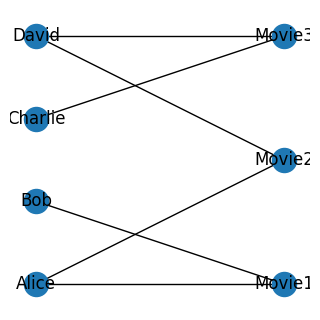

In [45]:
plt.figure(figsize=(3, 3))
nx.draw_bipartite(b, with_labels=True)
plt.show()

### 4. Graph to pandas

In [140]:
# Convert edges to DataFrame
edges_df = nx.to_pandas_edgelist(b)
print("Edges DataFrame:")
print(edges_df)

# Convert nodes to DataFrame
nodes_df = pd.DataFrame.from_dict(dict(b.nodes(data=True)), orient='index')
print("\nNodes DataFrame:")
print(nodes_df)

Edges DataFrame:
    source  target   timestamp  rating
0    Alice  Movie1  2024-01-01       5
1    Alice  Movie2  2024-01-02       4
2      Bob  Movie1  2024-01-01       3
3  Charlie  Movie3  2024-01-03       5
4    David  Movie2  2024-01-02       2

Nodes DataFrame:
         bipartite
Alice            0
Bob              0
Charlie          0
David            0
Movie1           1
Movie2           1
Movie3           1


## Layout Algorithm

```py
nx.draw_networkx_nodes(
    G, pos, node_color=node_color, node_size=node_size, alpha=0.9
)
nx.draw_networkx_edges(G, pos, alpha=0.5, width=1.5)
nx.draw_networkx_labels(G, pos, font_size=8)
```

<br>

Here are different poses:
- `nx.spring_layout(G, k=1, iterations=50)`
- `nx.circular_layout(G)`
- `nx.shell_layout(G, shells=shells)`
> we specify different nodes for eacg part: `shells = [center_nodes, middle_nodes, outer_nodes]`

There are many other algorithms

<br>

Layout Algorithm | Best For | Computational Complexity | Key Features
-----------------|----------|--------------------------|------------
Spring | General purpose | O(n²) to O(n³) | Force-directed, natural looking
Circular | Small graphs, cycles | O(n) | Simple, predictable
Shell | Concentric structures | O(n) | Good for hierarchical data
Planar | Planar graphs | O(n) | Preserves planarity
Spectral | Community detection | O(n³) | Based on graph Laplacian
Kamada-Kawai | Small to medium graphs | O(n²) | Energy minimization

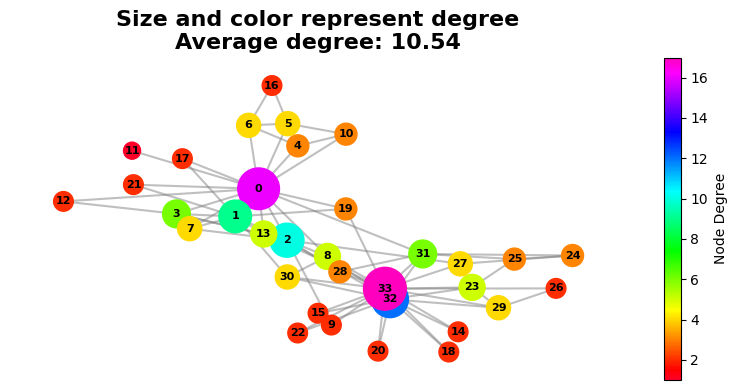

In [55]:
G = nx.karate_club_graph()
pos = nx.spring_layout(G, seed=42)

degrees = list(G.degree())
color = [d for n, d in degrees]
size = [(d * 50 + 100) for n, d in degrees]

plt.figure(figsize=(8, 4))
nodes = nx.draw_networkx_nodes(G, pos, node_size = size, node_color = color, cmap = 'gist_rainbow')
# if we have weights: edge_weights = [G[u][v].get('weight', 1.0) for u, v in G.edges()]
# width = [w * 2 for w in edge_weights] Thickness by weigh
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5, width=1.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')

plt.colorbar(nodes, label='Node Degree')
plt.title(
    f"Size and color represent degree\nAverage degree: {np.mean(degrees):.2f}",
    fontsize=16, fontweight='bold'
)
plt.axis('off')
plt.tight_layout()
plt.show()

## Connected Components

A connected component is a subgraph where any two nodes are connected to each other by paths, and which is connected to no additional nodes.

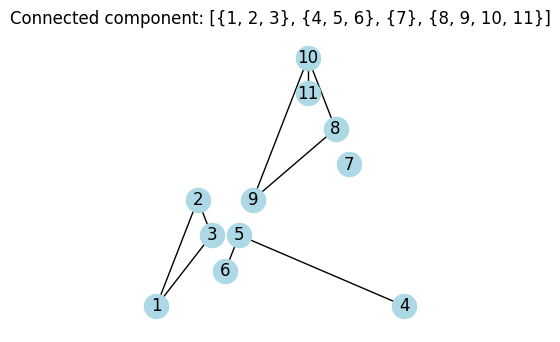

In [153]:
G = nx.Graph()
G.add_edges_from([(1,2), (2,3), (3,1)]) # Triangle
G.add_edges_from([(4,5), (5,6)]) # Line
# G.add_edges_from([(3,9)])
G.add_node(7)
G.add_edges_from([(8,9), (9,10), (10,8), (10,11)])
components = list(nx.connected_components(G))

plt.figure(figsize=(3, 3))
nx.draw_planar(G, with_labels = True, node_color='lightblue')
plt.title(f'Connected component: {components}')
plt.show()

In [70]:
# for i, comp in enumerate(components, 1):
#     print(f"Component {i}: {sorted(comp)}")
#     print(f"  Size: {len(comp)}")
#     print(f"  Is connected: {nx.is_connected(G.subgraph(comp))}")
#     print()

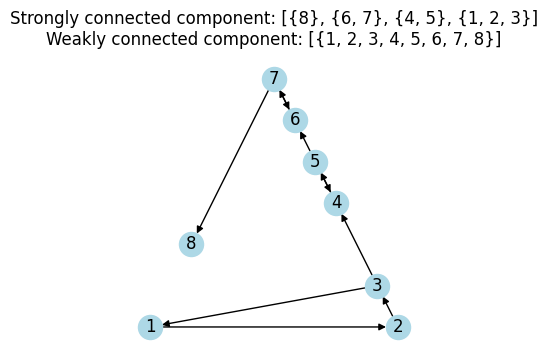

In [75]:
DG = nx.DiGraph()
DG.add_edges_from([
    (1,2), (2,3), (3,1),  # Strongly connected component
    (3,4), (4,5), (5,4),  # Another strongly connected component
    (5,6), (6,7), (7,6),  # And another
    (7,8)                 # Single node component
])

scc = list(nx.strongly_connected_components(DG))
wcc = list(nx.weakly_connected_components(DG))

plt.figure(figsize=(3, 3))
nx.draw_planar(DG, with_labels = True, node_color='lightblue')
plt.title(
    f'Strongly connected component: {scc}\n'
    f'Weakly connected component: {wcc}'
)
plt.show()

## Clustering Coefficient

It measures how connected a node's neighbors are to each other. It quantifies the "cliquishness" or local connectivity in a graph

1. Local Clustering Coefficient

 - For node $i$ with degree $k_i$
        
\begin{equation}
C(i) = \frac{2 \times T(i)}{k_i(k_i - 1)}
\end{equation}

> $T(i)$ = number of triangles connected to node $i$ <br>
$k_i$ = degree of node $i$

<br>

- Alternative Formulation


\begin{equation}
C(i) = \frac{2e_i}{k_i(k_i - 1)}
\end{equation}

> $e_i$ = number of edges between neighbors of node $i$

<br>

2. Global Clustering Coefficient

\begin{equation}
C_{\text{trans}} = \frac{3 \times \text{\# of triangles}}{\text{\# of connected triples}}
\end{equation}


\begin{equation}
C_{\text{avg}} = \frac{1}{n} \sum_{i=1}^{n} C(i)
\end{equation}

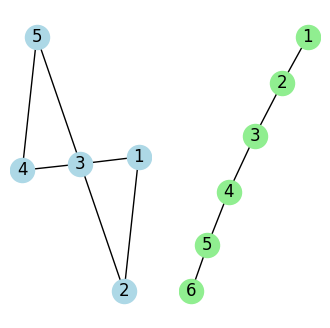

In [65]:
G1 = nx.Graph()  # Highly clustered
G1.add_edges_from([(1,2), (2,3), (3,1), (3,4), (4,5), (5,3)])  # Triangles

G2 = nx.Graph()  # Low clustering
G2.add_edges_from([(1,2), (2,3), (3,4), (4,5), (5,6)])  # Chain

plt.figure(figsize=(4, 4))
plt.subplot(1, 2, 1)
nx.draw(G1, with_labels = True, node_color = 'lightblue', ax = plt.gca())

plt.subplot(1, 2, 2)
nx.draw(G2, with_labels = True, node_color = 'lightgreen', ax = plt.gca())

In [ ]:
def local_clustering_coefficient(G, node):
    neighbors = list(G.neighbors(node))
    n_neigh = len(neighbors)
    possible_connections = n_neigh * (n_neigh - 1) / 2

    if possible_connections == 0:
        return 0

    actual_connections = 0
    for i in range(n_neigh):
        for j in range(i + 1, n_neigh):
            if G.has_edge(neighbors[i], neighbors[j]):
                actual_connections += 1

    coefficient = actual_connections / possible_connections
    return coefficient

In [123]:
local_clustering_coefficient(G1, 3)

0.3333333333333333

In [125]:
# Global Clustering Coefficient
# Transitivity (ratio of triangles to triplets)
transitivity = nx.transitivity(G1)

# Average local clustering
avg_clustering = nx.average_clustering(G1)

print(f"Transitivity: {transitivity:.2f}")
print(f"Average local clustering: {avg_clustering:.2f}")

Transitivity: 0.60
Average local clustering: 0.87


## Dataset
[NetworkX](https://networkx.org/documentation/stable/reference/generators.html#module-networkx.generators.social)

[Stanford SNAP Datasets](https://snap.stanford.edu/data/)

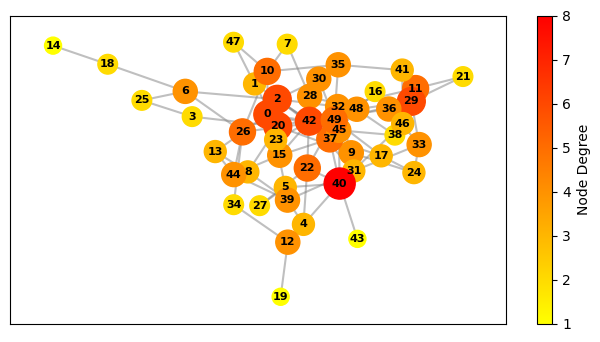

In [ ]:
G = nx.erdos_renyi_graph(50, 0.08, seed=42)
pos = nx.spring_layout(G, seed=123)
degrees = G.degree()
color = [d for _, d in degrees]
size = [d * 50 + 100 for _, d in degrees]

plt.figure(figsize=(8, 4))
nodes = nx.draw_networkx_nodes(G, pos, node_size = size, node_color = color, cmap = 'autumn_r')
nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.5, width=1.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
plt.colorbar(nodes, label='Node Degree')
plt.show()

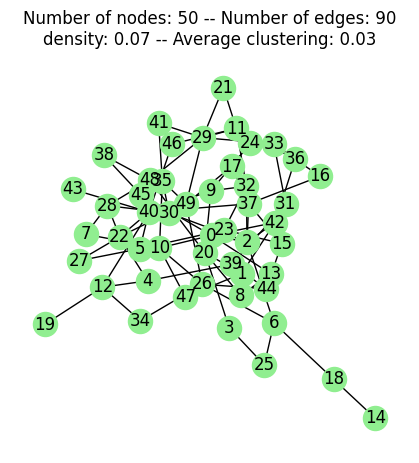

In [121]:
components = list(nx.connected_components(G))
component_sizes = [len(comp) for comp in components]

biggest_comp = max(components, key = len)
biggest_subgraph = G.subgraph(biggest_comp)

nodes = G.number_of_nodes()
edges = G.number_of_edges()
density = nx.density(G) # Measures how close a network is to being a complete graph
avg_clustering = nx.average_clustering(G) # How likely that a node neighbors are each other neighbors

plt.figure(figsize=(4, 4))
nx.draw_spring(biggest_subgraph, with_labels=True, node_color='lightgreen')
plt.title(
    f"Number of nodes: {nodes} -- "
    f"Number of edges: {edges}\n"
    f"density: {density:.2f} -- "
    f"Average clustering: {avg_clustering:.2f}"
)
plt.show()

### Degree Distribution: "Who Has How Many Connections?"

The Degree Distribution is the most fundamental property of a network. It describes the spread of connectivity across the nodes.  It answers the question: "How many nodes have 1 connection? How many have 2? How many have 10, or 100?"

- Are most people clustered around 10 friends (a bell curve)?
- Or do most people have very few friends, while a handful of popular people have hundreds (a long-tailed distribution)?
> nodes: people, edges: friendship


**Social Networks (Facebook):** Most users have a few hundred friends, but a few celebrities have millions of followers. This is a scale-free or power-law distribution. It tells us the network is dominated by highly connected "hubs."

**Road Networks:** The distribution is narrow. Most intersections (nodes) connect to 3 or 4 roads (edges). There are no intersections with thousands of connections. This is a Poisson distribution. It tells us the network is relatively uniform and random.

**Epidemiology:** The degree distribution is critical. A virus will spread explosively if it reaches a highly connected hub. Understanding the distribution helps model and contain outbreaks.

In [160]:
from collections import Counter

degrees = list(dict(G.degree()).values())
degree_counts = Counter(degrees)
degrees_sorted = sorted(degree_counts.keys())
counts_sorted = [degree_counts[d] for d in degrees_sorted]

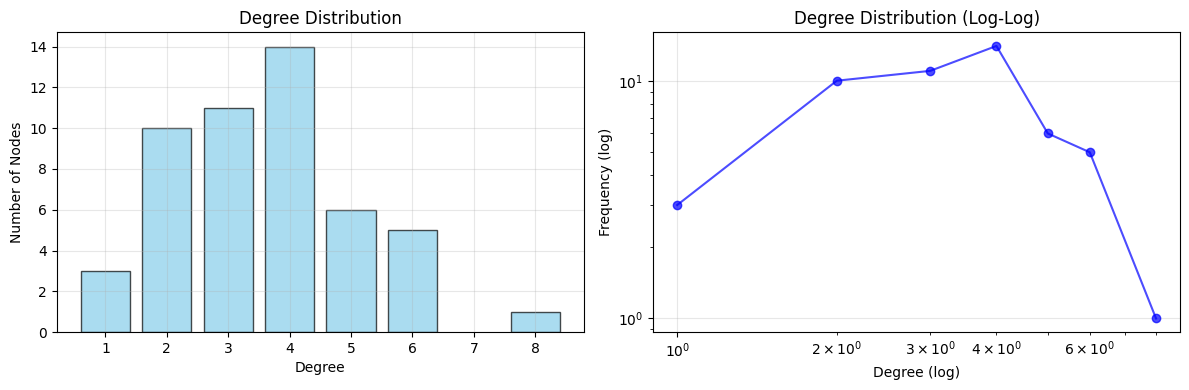

In [147]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(degrees_sorted, counts_sorted, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Degree')
plt.ylabel('Number of Nodes')
plt.title('Degree Distribution')
plt.grid(True, alpha=0.3)

# Log-log plot for power-law checking
plt.subplot(1, 2, 2)
plt.loglog(degrees_sorted, counts_sorted, 'bo-', alpha=0.7)
plt.xlabel('Degree (log)')
plt.ylabel('Frequency (log)')
plt.title('Degree Distribution (Log-Log)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Average Clustering: "How Cliquey Is The Network On Average?"

This metric builds on the Local Clustering Coefficient we discussed earlier.

The Core Idea: It's the simple average of the local clustering coefficients of all nodes in the network. It quantifies the overall tendency of the network to form tightly-knit groups

- For each person in a social network, you calculate how likely it is that their friends are also friends with each other (their local clustering coefficient).
- You then take the average of all these individual scores.

<br>

### **Why it matters:**
- High Average Clustering (~0.5-1.0): The network is full of "cliques" or "echo chambers." Your friends are likely to be friends with each other. This is typical of social networks (your coworkers all know each other, your friend group from college is tight-knit).
- Low Average Clustering (~0.0-0.2): The network is more like a tree or a highway system. Your connections don't tend to connect to each other. This is typical of transportation networks or random networks.

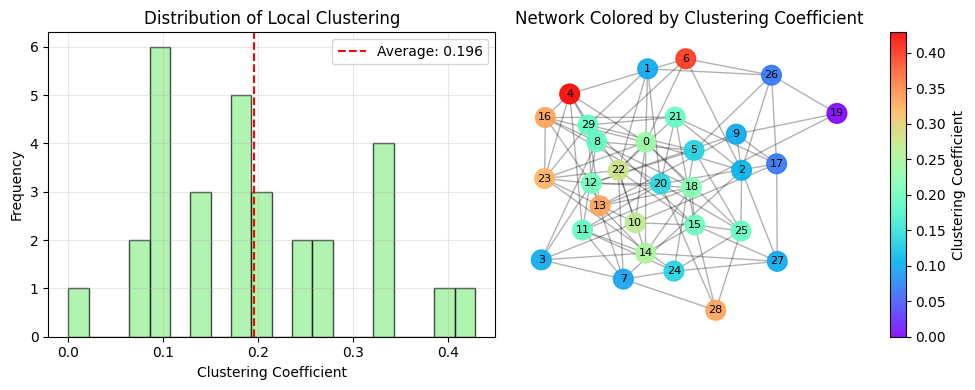

In [155]:
G = nx.erdos_renyi_graph(30, 0.2, seed=123)
# G = nx.karate_club_graph()
local_clustering = nx.clustering(G)
clustering_values = list(local_clustering.values())
avg_clustering = nx.average_clustering(G)

plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(clustering_values, bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.title('Distribution of Local Clustering')
plt.axvline(avg_clustering, color='red', linestyle='--', label=f'Average: {avg_clustering:.3f}')
plt.legend()
plt.grid(True, alpha=0.3)

# Visualize clustering on graph
plt.subplot(1, 2, 2)
pos = nx.spring_layout(G, seed=42)
# Color nodes by clustering coefficient
node_colors = [local_clustering[node] for node in G.nodes()]
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap='rainbow', node_size=200, alpha=0.9)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title('Network Colored by Clustering Coefficient')
plt.colorbar(nodes, label='Clustering Coefficient')
plt.axis('off')

plt.tight_layout()
plt.show()

### Centrality Measures (Node Importance)
Measure influence or importance of nodes in a network.

- Degree Centrality: Nodes with most connections.
- Betweenness Centrality: Nodes that act as bridges.
- Closeness Centrality: Nodes close to all others (shortest paths).
- Eigenvector Centrality: Nodes connected to other important nodes.
- PageRank: Weighted eigenvector centrality (used in web ranking).

In [178]:
centrality_measures = {
    'degree': nx.degree_centrality(G),
    'betweenness': nx.betweenness_centrality(G),
    'closeness': nx.closeness_centrality(G),
    'eigenvector': nx.eigenvector_centrality(G, max_iter=1000),
    'pagerank': nx.pagerank(G)
}

for name, values in centrality_measures.items():
    print(f"{name.title()} Centrality (Top 3):", sorted(values.items(), key=lambda x: -x[1])[:3])

Degree Centrality (Top 3): [(40, 0.16326530612244897), (0, 0.12244897959183673), (2, 0.12244897959183673)]
Betweenness Centrality (Top 3): [(40, 0.19373177842565598), (2, 0.12487852283770648), (6, 0.1161868318756074)]
Closeness Centrality (Top 3): [(40, 0.4152542372881356), (2, 0.4117647058823529), (0, 0.4049586776859504)]
Eigenvector Centrality (Top 3): [(0, 0.28165415694366397), (2, 0.28073343378791793), (42, 0.25804005686456033)]
Pagerank Centrality (Top 3): [(40, 0.04239727239367234), (20, 0.03157962750778398), (29, 0.030537844509728535)]
